## K Nearest Neighbour [KNN]

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
dz=pd.read_csv('Zoo.csv')

In [3]:
dz.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
dz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
dz.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [6]:
dz.duplicated().any()

False

In [7]:
# Separate 'legs' into sub-categories

zoo = pd.get_dummies(dz,columns=['legs'])
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,antelope,1,0,0,1,0,0,0,1,1,...,1,0,1,1,0,0,1,0,0,0
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,0,4,1,0,0,0,0,0
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,boar,1,0,0,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,1,0,1,1,0,1,0,0,0,0
97,wasp,1,0,1,0,1,0,0,0,0,...,0,0,0,6,0,0,0,0,1,0
98,wolf,1,0,0,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,7,1,0,0,0,0,0


<Axes: >

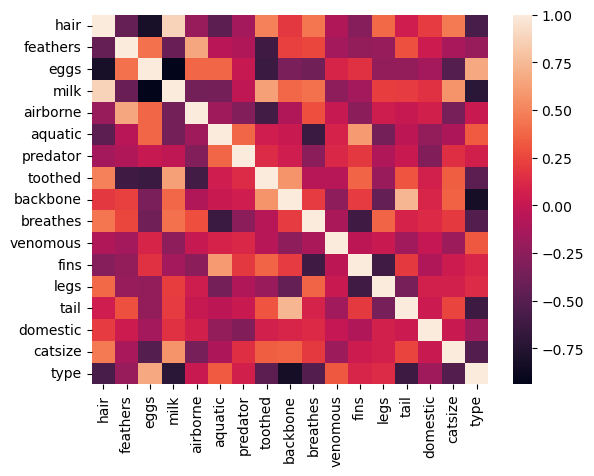

In [8]:
# Creating heatmap

corr=dz.corr()
sns.heatmap(corr)

In [19]:
# Split into features and target
target = zoo[['type']]
target

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [10]:
import sklearn as sk
print(sk.__version__)   #updated version

1.2.2


In [11]:
Zoo = zoo.drop('type', axis=1)
features = Zoo.drop('animal name', axis=1)   # animal name is not a feature
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
98,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [12]:
# Split into training and testing data
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 21)
(26, 21)
(75, 1)
(26, 1)


In [13]:
# Grid search for hyperparameter tuning

n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [14]:
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn, param_grid=param_grid,cv=10)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'n_neighbors': 1}


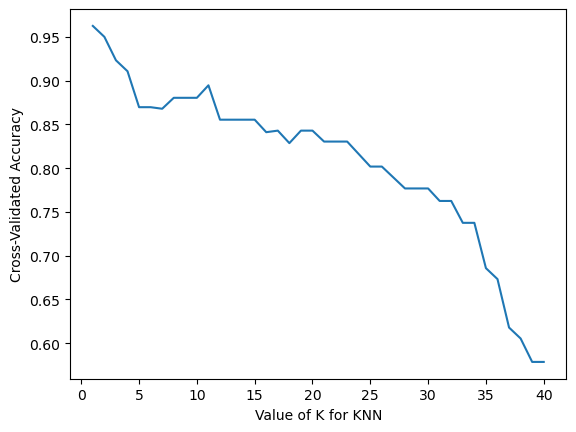

In [15]:
# Visualizing CV results
from sklearn.model_selection import cross_val_score

%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [16]:
# Predicting the model

model = KNeighborsClassifier(n_neighbors =1).fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9615384615384616


In [17]:
# Confusion matrix

confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[11  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  2]]


In [18]:
# Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.78      0.83      0.80        26
weighted avg       0.94      0.96      0.95        26

